# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/Bangkit')]

In [ ]:
df = pd.DataFrame()

In [ ]:
for file in files:
    data = pd.read_csv('/content/drive/MyDrive/Bangkit/' + file)
    df = pd.concat([df, data])

# Data Cleaning, Wrangling, and Feature Engineering

In [ ]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors="coerce")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186850 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
df.groupby(['Product']).count()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address
Product,,,,,
20in Monitor,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800


In [ ]:
wh = df[df['Product'] == 'USB-C Charging Cable']

In [ ]:
wh = wh.dropna()

In [ ]:
wh.drop(wh[wh['Order Date'] == "Order Date"].index, inplace = True)

In [ ]:
from datetime import datetime
def todate(s):
    return datetime.strptime(str(s[4]), '%m/%d/%y %H:%M')

In [ ]:
wh['Order Date'] = wh.apply(todate, axis=1)

In [ ]:
wh['Order Date'] = pd.to_datetime(wh['Order Date'])

In [ ]:
wh

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17,236687,USB-C Charging Cable,1.0,11.95,2019-08-23 12:54:00,"668 Meadow St, New York City, NY 10001"
21,236691,USB-C Charging Cable,1.0,11.95,2019-08-23 07:34:00,"916 Meadow St, Boston, MA 02215"
22,236692,USB-C Charging Cable,1.0,11.95,2019-08-20 13:26:00,"567 Center St, San Francisco, CA 94016"
47,236716,USB-C Charging Cable,1.0,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016"
58,236727,USB-C Charging Cable,1.0,11.95,2019-08-19 08:10:00,"557 North St, New York City, NY 10001"
...,...,...,...,...,...,...
13599,222888,USB-C Charging Cable,1.0,11.95,2019-06-11 15:59:00,"615 Elm St, Boston, MA 02215"
13604,222893,USB-C Charging Cable,1.0,11.95,2019-06-28 18:50:00,"802 Church St, Los Angeles, CA 90001"
13605,222894,USB-C Charging Cable,1.0,11.95,2019-06-15 16:56:00,"449 12th St, Seattle, WA 98101"
13619,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"


In [ ]:
wh['Date'] = wh['Order Date'].dt.date

In [ ]:
wh

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
17,236687,USB-C Charging Cable,1.0,11.95,2019-08-23 12:54:00,"668 Meadow St, New York City, NY 10001",2019-08-23
21,236691,USB-C Charging Cable,1.0,11.95,2019-08-23 07:34:00,"916 Meadow St, Boston, MA 02215",2019-08-23
22,236692,USB-C Charging Cable,1.0,11.95,2019-08-20 13:26:00,"567 Center St, San Francisco, CA 94016",2019-08-20
47,236716,USB-C Charging Cable,1.0,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",2019-08-17
58,236727,USB-C Charging Cable,1.0,11.95,2019-08-19 08:10:00,"557 North St, New York City, NY 10001",2019-08-19
...,...,...,...,...,...,...,...
13599,222888,USB-C Charging Cable,1.0,11.95,2019-06-11 15:59:00,"615 Elm St, Boston, MA 02215",2019-06-11
13604,222893,USB-C Charging Cable,1.0,11.95,2019-06-28 18:50:00,"802 Church St, Los Angeles, CA 90001",2019-06-28
13605,222894,USB-C Charging Cable,1.0,11.95,2019-06-15 16:56:00,"449 12th St, Seattle, WA 98101",2019-06-15
13619,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019-06-22


In [ ]:
wh = wh.set_index('Order Date')

In [ ]:
wh

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date
Order Date,,,,,,
2019-08-23 12:54:00,236687,USB-C Charging Cable,1.0,11.95,"668 Meadow St, New York City, NY 10001",2019-08-23
2019-08-23 07:34:00,236691,USB-C Charging Cable,1.0,11.95,"916 Meadow St, Boston, MA 02215",2019-08-23
2019-08-20 13:26:00,236692,USB-C Charging Cable,1.0,11.95,"567 Center St, San Francisco, CA 94016",2019-08-20
2019-08-17 20:12:00,236716,USB-C Charging Cable,1.0,11.95,"84 Cedar St, San Francisco, CA 94016",2019-08-17
2019-08-19 08:10:00,236727,USB-C Charging Cable,1.0,11.95,"557 North St, New York City, NY 10001",2019-08-19
...,...,...,...,...,...,...
2019-06-11 15:59:00,222888,USB-C Charging Cable,1.0,11.95,"615 Elm St, Boston, MA 02215",2019-06-11
2019-06-28 18:50:00,222893,USB-C Charging Cable,1.0,11.95,"802 Church St, Los Angeles, CA 90001",2019-06-28
2019-06-15 16:56:00,222894,USB-C Charging Cable,1.0,11.95,"449 12th St, Seattle, WA 98101",2019-06-15


In [ ]:
wh = wh.sort_values(['Order Date'], ascending=[1])

In [ ]:
wh

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date
Order Date,,,,,,
2019-01-01 03:40:00,148041,USB-C Charging Cable,1.0,11.95,"760 Church St, San Francisco, CA 94016",2019-01-01
2019-01-01 06:03:00,149350,USB-C Charging Cable,2.0,11.95,"943 2nd St, Atlanta, GA 30301",2019-01-01
2019-01-01 07:47:00,149586,USB-C Charging Cable,1.0,11.95,"631 Lakeview St, San Francisco, CA 94016",2019-01-01
2019-01-01 09:36:00,146112,USB-C Charging Cable,1.0,11.95,"973 Adams St, Portland, OR 97035",2019-01-01
2019-01-01 09:48:00,147758,USB-C Charging Cable,1.0,11.95,"281 North St, Atlanta, GA 30301",2019-01-01
...,...,...,...,...,...,...
2019-12-31 23:16:00,315109,USB-C Charging Cable,2.0,11.95,"601 South St, New York City, NY 10001",2019-12-31
2020-01-01 00:59:00,300362,USB-C Charging Cable,1.0,11.95,"581 River St, San Francisco, CA 94016",2020-01-01
2020-01-01 01:52:00,314066,USB-C Charging Cable,1.0,11.95,"922 8th St, New York City, NY 10001",2020-01-01


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
wh = wh.astype({'Price Each':'float'})
wh = wh.astype({'Quantity Ordered':'float'})

In [ ]:
wh = wh.drop(['Purchase Address'], axis = 1)

In [ ]:
wh

,Order ID,Product,Quantity Ordered,Price Each,Date
Order Date,,,,,
2019-01-01 03:40:00,148041,USB-C Charging Cable,1.0,11.95,2019-01-01
2019-01-01 06:03:00,149350,USB-C Charging Cable,2.0,11.95,2019-01-01
2019-01-01 07:47:00,149586,USB-C Charging Cable,1.0,11.95,2019-01-01
2019-01-01 09:36:00,146112,USB-C Charging Cable,1.0,11.95,2019-01-01
2019-01-01 09:48:00,147758,USB-C Charging Cable,1.0,11.95,2019-01-01
...,...,...,...,...,...
2019-12-31 23:16:00,315109,USB-C Charging Cable,2.0,11.95,2019-12-31
2020-01-01 00:59:00,300362,USB-C Charging Cable,1.0,11.95,2020-01-01
2020-01-01 01:52:00,314066,USB-C Charging Cable,1.0,11.95,2020-01-01


In [ ]:
def create_features(wh):
    wh = wh.copy()
    wh['revenue'] = wh['Quantity Ordered'] * wh['Price Each']
    wh['hour'] = wh.index.hour
    wh['dayofweek'] = wh.index.dayofweek
    wh['quarter'] = wh.index.quarter
    wh['month'] = wh.index.month
    wh['year'] = wh.index.year
    wh['dayofyear'] = wh.index.dayofyear
    wh['dayofmonth'] = wh.index.day
    wh['weekofyear'] = wh.index.isocalendar().week
    return wh

In [ ]:
wh = create_features(wh)

In [ ]:
wh

,Order ID,Product,Quantity Ordered,Price Each,Date,revenue,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Order Date,,,,,,,,,,,,,,
2019-01-01 03:40:00,148041,USB-C Charging Cable,1.0,11.95,2019-01-01,11.95,3,1,1,1,2019,1,1,1
2019-01-01 06:03:00,149350,USB-C Charging Cable,2.0,11.95,2019-01-01,23.90,6,1,1,1,2019,1,1,1
2019-01-01 07:47:00,149586,USB-C Charging Cable,1.0,11.95,2019-01-01,11.95,7,1,1,1,2019,1,1,1
2019-01-01 09:36:00,146112,USB-C Charging Cable,1.0,11.95,2019-01-01,11.95,9,1,1,1,2019,1,1,1
2019-01-01 09:48:00,147758,USB-C Charging Cable,1.0,11.95,2019-01-01,11.95,9,1,1,1,2019,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:16:00,315109,USB-C Charging Cable,2.0,11.95,2019-12-31,23.90,23,1,4,12,2019,365,31,1
2020-01-01 00:59:00,300362,USB-C Charging Cable,1.0,11.95,2020-01-01,11.95,0,2,1,1,2020,1,1,1
2020-01-01 01:52:00,314066,USB-C Charging Cable,1.0,11.95,2020-01-01,11.95,1,2,1,1,2020,1,1,1


In [ ]:
order = wh.groupby(['Date'])['Quantity Ordered'].sum()

In [ ]:
order = pd.DataFrame(order)

In [ ]:
order.index = pd.to_datetime(order.index)

In [ ]:
train = order.loc[order.index < '10-20-2019']
test = order.loc[order.index >= '10-20-2019']

In [ ]:
print(len(train),len(test))

292 74


# Model Building #1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

array([[0.12857143],
       [0.18571429],
       [0.12857143],
       [0.08571429],
       [0.35714286],
       [0.05714286],
       [0.08571429],
       [0.15714286],
       [0.17142857],
       [0.22857143],
       [0.12857143],
       [0.18571429],
       [0.28571429],
       [0.28571429],
       [0.04285714],
       [0.04285714],
       [0.        ],
       [0.22857143],
       [0.28571429],
       [0.47142857],
       [0.15714286],
       [0.22857143],
       [0.1       ],
       [0.24285714],
       [0.21428571],
       [0.25714286],
       [0.17142857],
       [0.27142857],
       [0.22857143],
       [0.17142857],
       [0.11428571],
       [0.35714286],
       [0.45714286],
       [0.2       ],
       [0.25714286],
       [0.32857143],
       [0.44285714],
       [0.25714286],
       [0.2       ],
       [0.44285714],
       [0.24285714],
       [0.22857143],
       [0.35714286],
       [0.34285714],
       [0.28571429],
       [0.28571429],
       [0.52857143],
       [0.457

In [ ]:
length = 1000
n_features = 1

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

ValueError: ignored

In [ ]:
X, y = generator[0]

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=12, batch_size=1)

In [ ]:
model.fit(generator, epochs=50, 
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/50
280/280 [==============================] - 3s 11ms/step - loss: 0.0202 - val_loss: 0.0624
Epoch 2/50
280/280 [==============================] - 3s 11ms/step - loss: 0.0208 - val_loss: 0.0499
Epoch 3/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0193 - val_loss: 0.0536
Epoch 4/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0192 - val_loss: 0.0501
Epoch 5/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0200 - val_loss: 0.0531
Epoch 6/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0195 - val_loss: 0.0514
Epoch 7/50
280/280 [==============================] - 3s 10ms/step - loss: 0.0194 - val_loss: 0.0505
Epoch 8/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0195 - val_loss: 0.0501
Epoch 9/50
280/280 [==============================] - 2s 9ms/step - loss: 0.0197 - val_loss: 0.0513
Epoch 10/50
280/280 [==============================] - 2s 8ms/step - loss: 0.0197 - val_loss: 0.0

KeyboardInterrupt: ignored

<Axes: >

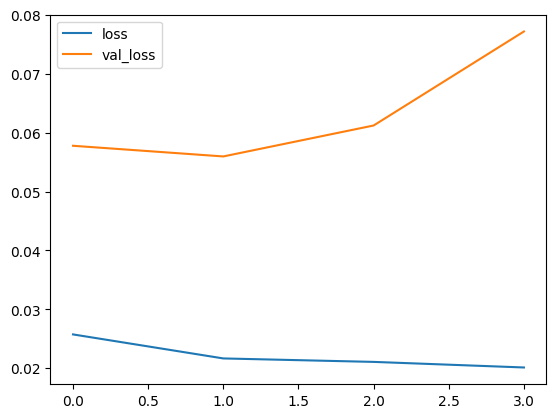

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

for i in range(len(test)):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 34ms/step


In [ ]:
true_prediction = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_prediction

<ipython-input-328-661b3dfb2b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_prediction


In [ ]:
test

,Quantity Ordered,Predictions
Date,,
2019-10-20,84.0,60.111662
2019-10-21,77.0,58.611940
2019-10-22,94.0,57.274773
2019-10-23,72.0,55.757815
2019-10-24,74.0,54.515134
...,...,...
2019-12-28,95.0,36.719044
2019-12-29,95.0,36.714603
2019-12-30,77.0,36.710552


<Axes: xlabel='Date'>

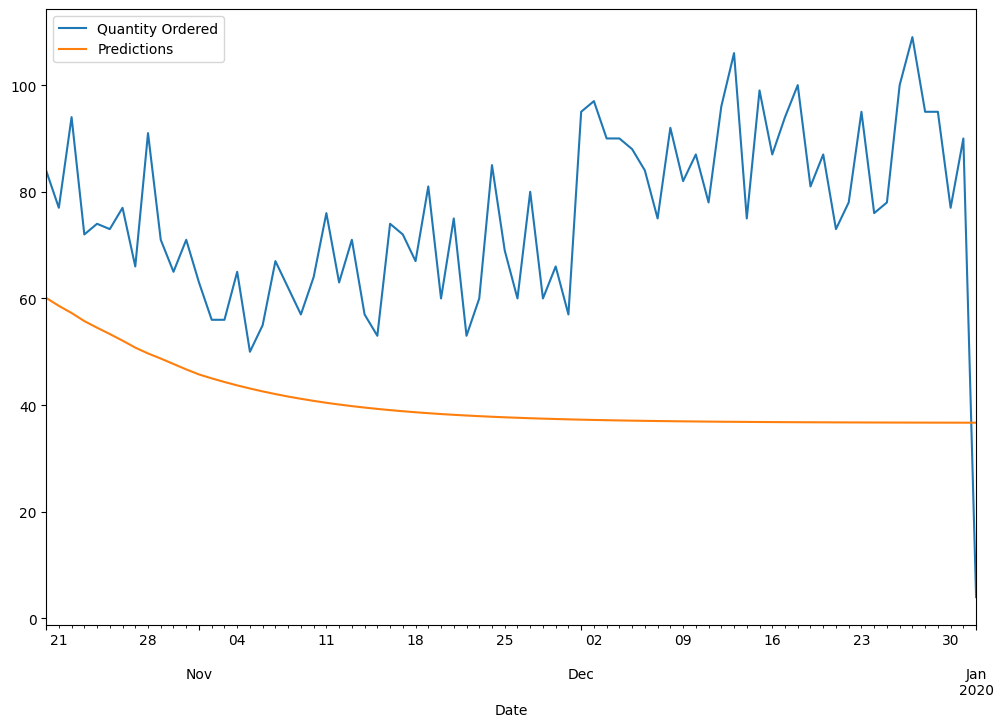

In [ ]:
test.plot(figsize=(12, 8))

In [ ]:
VAL = 'Quantity Ordered'

y_train = train['Quantity Ordered']
X_train = pd.DataFrame(train.index)

y_test = test['Quantity Ordered']
X_test = pd.DataFrame(test.index)

In [ ]:
test.plot(figsize=(12, 8))

In [ ]:
X_train.index = X_train['Date']
X_test.index = X_test['Date']

# Model Building #2

In [ ]:
def windowed_dataset(series, window_size=20, batch_size=32, shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    
    
    return dataset

In [ ]:
import tensorflow as tf
import numpy as np
from dataclasses import dataclass

In [ ]:
test_dataset = windowed_dataset(y_train, window_size=1, batch_size=5, shuffle_buffer=1)
batch_of_features, batch_of_labels = next((iter(test_dataset)))

In [ ]:
def test_model():   
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(1)
    ]) 
    return model

In [ ]:
dataset = windowed_dataset(y_train)

In [ ]:
def create_model():

    tf.random.set_seed(51)
    model = create_uncompiled_model()
    model.compile(loss="mse", optimizer='adam', metrics=["mae"])  
    
    return model

In [ ]:
model = create_model()
trained = model.fit(dataset, epochs=50)

Epoch 1/50
9/9 [==============================] - 10s 39ms/step - loss: 2995.8176 - mae: 52.3132
Epoch 2/50
9/9 [==============================] - 0s 34ms/step - loss: 1180.6611 - mae: 30.8316
Epoch 3/50
9/9 [==============================] - 0s 32ms/step - loss: 381.6486 - mae: 15.5047
Epoch 4/50
9/9 [==============================] - 0s 30ms/step - loss: 202.5761 - mae: 11.3399
Epoch 5/50
9/9 [==============================] - 0s 33ms/step - loss: 206.8626 - mae: 11.6864
Epoch 6/50
9/9 [==============================] - 0s 34ms/step - loss: 199.3399 - mae: 11.3415
Epoch 7/50
9/9 [==============================] - 0s 36ms/step - loss: 194.1780 - mae: 10.9228
Epoch 8/50
9/9 [==============================] - 0s 34ms/step - loss: 190.9562 - mae: 10.7526
Epoch 9/50
9/9 [==============================] - 0s 36ms/step - loss: 188.4871 - mae: 10.7114
Epoch 10/50
9/9 [==============================] - 0s 34ms/step - loss: 186.1757 - mae: 10.7172
Epoch 11/50
9/9 [=============================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [ ]:
def compute_metrics(true_series, forecast):
    
    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test

,Quantity Ordered
Date,
2019-10-20,89.0
2019-10-21,90.0
2019-10-22,83.0
2019-10-23,74.0
2019-10-24,100.0
...,...
2019-12-28,102.0
2019-12-29,111.0
2019-12-30,108.0


11/11 [==============================] - 3s 29ms/step


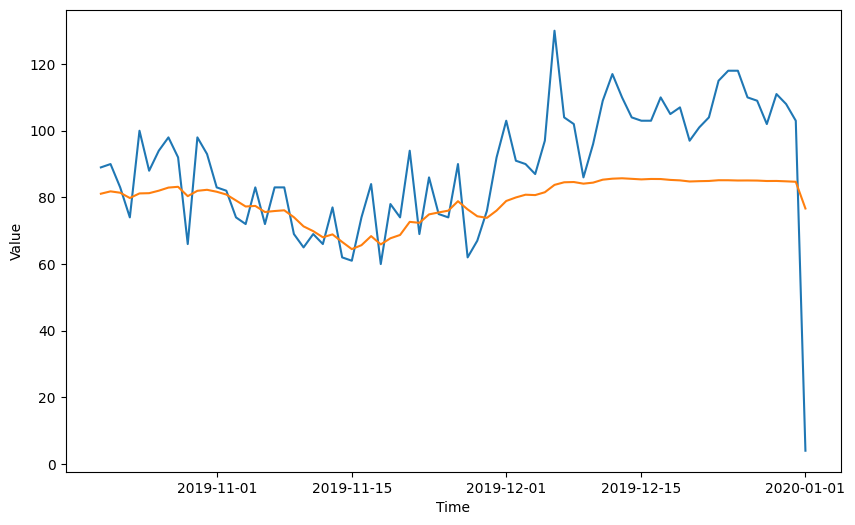

In [ ]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, order['Quantity Ordered'], window_size=20).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[347 - 74:]

# Plot it
plt.figure(figsize=(10, 6))

plot_series(X_test, y_test)
plot_series(X_test, rnn_forecast)